Merge output files in subfolder

In [2]:
import os

# Define the path to the output folder
output_folder = "../../output"

# Get a list of all subfolders in the output folder
subfolders = [f.path for f in os.scandir(output_folder) if f.is_dir()]

# Initialize an empty list to store the contents of the output files
output_lines = []

# Iterate over each subfolder
for subfolder in subfolders:
    if subfolder.__contains__("leafSize"):
        continue
    if subfolder.__contains__("int_ps"):
        continue
    if subfolder.__contains__("ps"):
        continue
    if not subfolder.__contains__("_new"):
        continue
    

    # Define the path to the output file in the current subfolder
    output_file = os.path.join(subfolder, "output_new.csv")
    
    # Read the contents of the output file
    with open(output_file, "r") as file:
        lines = file.readlines()
    
    # Append the lines to the output_lines list
    output_lines.extend(lines)

# Define the path to the merged output file
merged_file = os.path.join(".", "merged_new.csv")

# Write the merged output lines to the merged output file
with open(merged_file, "w") as file:
    file.writelines(output_lines)


Process the raw output file, by removing header lines and spaces

In [3]:
with open('./merged_new.csv', 'r') as file:
    lines = file.readlines()

# Remove all spaces in all rows
lines = [line.replace(' ', '') for line in lines]

# Remove lines that are the same as the first one
header = lines[0]
lines = [line for line in lines[1:] if line != lines[0]]

# Join the lines back into a single string
output = ''.join(lines)

# Save the output to a file
with open('preprocessed_new.csv', 'w') as file:
    file.write(header)
    file.write(output)


In [6]:
import pandas as pd
def separateOps(op):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv('preprocessed_new.csv')


    df = df[df['op'] == op]
    df.drop(['nodeCount_Leaf', 'nodeCount_Inner', 'nodeCount_Dense', 'nodeCount_Hash', 'nodeCount_Head4', 'nodeCount_Head8', 'nodeCount_Dense2'], axis=1, inplace=True)
    df.drop(['cycle', 'instr', 'LLC_miss','CPU','L1_miss', 'br_miss', 'scale', 'counted_final_key_count', 'GHz', 'task', 'IPC'], axis=1, inplace=True)

    df
    # Drop the 'op' column
    df.drop('op', axis=1, inplace=True)

    # save the file to op_ycsb_c.csv
    df.to_csv(op+'_new.csv', index=False)

for op in ['ycsb_c', 'ycsb_c_init', 'ycsb_e', 'ycsb_e_init']:
    separateOps(op)


Process the data in pandas

In [5]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('preprocessed_new.csv')
df = df[df['time'] != 0]
df.drop('run_id', axis=1, inplace=True)
df.drop('bin_name', axis=1, inplace=True)

df['time_per_op'] = df['time'] / df['scale']
df.drop('time', axis=1, inplace=True)
df.rename(columns={'time_per_op': 'time'}, inplace=True)
# Display the DataFrame
df.to_csv('preprocessed_new.csv', index=False)


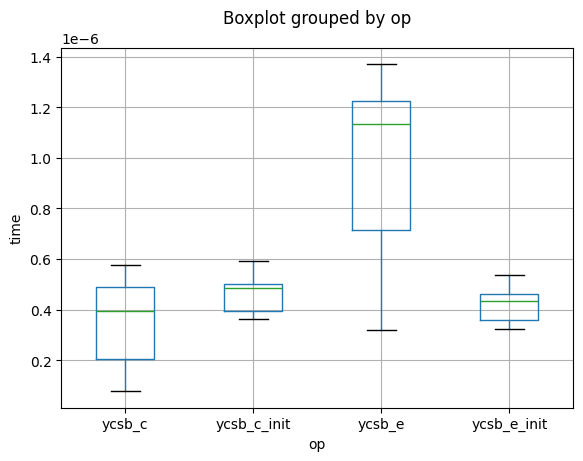

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('preprocessed_new.csv')

# Create a boxplot of the data
ax = df.boxplot(column='time', by='op')
ax.set_ylabel('time')

# Remove the title
ax.set_title('')

plt.show()


XAI - provides a way to compute and visualize the importance of features using premutation importance

In [8]:
# check the data types
df.dtypes

config_name                   object
const_basicHintCount          object
const_enableBasicHead         object
const_enableDense             object
const_enableDense2            object
const_enableDensifySplit      object
const_enableHash              object
const_enableHashAdapt         object
const_enableHeadNode          object
const_enablePrefix            object
const_hashSimdWidth           object
const_hashSortUseStdMerge     object
const_hashUseCrc32            object
const_hashUseSimd             object
const_headNode4HintCount      object
const_headNode8HintCount     float64
const_pageSizeInner          float64
const_pageSizeLeaf           float64
data_name                     object
data_size                    float64
data_sorted                  float64
density                      float64
op                            object
payload_size                 float64
rand_seed                    float64
ycsb_range_len               float64
ycsb_zipf                    float64
n

SHAP file

In [9]:
with open('./shap_raw.csv', 'r') as file:
    lines = file.readlines()

# Remove all spaces in all rows
lines = [line.replace(' ', '') for line in lines]

# Remove lines that are the same as the first one
header = lines[0]
lines = [line for line in lines[1:] if line != lines[0]]

# Join the lines back into a single string
output = ''.join(lines)

# Save the output to a file
with open('shap_raw.csv', 'w') as file:
    file.write(header)
    file.write(output)


In [10]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('shap_raw.csv')
df = df[df['time'] != 0]
df.drop('run_id', axis=1, inplace=True)
df.drop('bin_name', axis=1, inplace=True)
df.drop(['cycle', 'instr', 'LLC_miss','CPU','L1_miss', 'br_miss', 'scale', 'counted_final_key_count', 'GHz', 'time', 'task', 'IPC'], axis=1, inplace=True)
df.drop(['nodeCount_Leaf', 'nodeCount_Inner', 'nodeCount_Dense', 'nodeCount_Hash', 'nodeCount_Head4', 'nodeCount_Head8', 'nodeCount_Dense2'], axis=1, inplace=True)

# Display the DataFrame
df.to_csv('shap_raw.csv', index=False)

KeyError: 'time'